# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import numpy as np
import os
from unityagents import UnityEnvironment

import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

from ddpg_agent import Agent

In [2]:
env = UnityEnvironment(file_name=os.getcwd() + "/Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

Episode 10	Current Max Score: 0.00; Avg: 0.02
Episode 20	Current Max Score: 0.00; Avg: 0.01
Episode 30	Current Max Score: 0.00; Avg: 0.01
Episode 40	Current Max Score: 0.00; Avg: 0.01
Episode 50	Current Max Score: 0.00; Avg: 0.00
Episode 60	Current Max Score: 0.00; Avg: 0.00
Episode 70	Current Max Score: 0.00; Avg: 0.00
Episode 80	Current Max Score: 0.00; Avg: 0.01
Episode 90	Current Max Score: 0.00; Avg: 0.00
Episode 100	Current Max Score: 0.00; Avg: 0.00
Episode 110	Current Max Score: 0.00; Avg: 0.00
Episode 120	Current Max Score: 0.00; Avg: 0.00
Episode 130	Current Max Score: 0.00; Avg: 0.00
Episode 140	Current Max Score: 0.00; Avg: 0.00
Episode 150	Current Max Score: 0.00; Avg: 0.00
Episode 160	Current Max Score: 0.00; Avg: 0.00
Episode 170	Current Max Score: 0.00; Avg: 0.00
Episode 180	Current Max Score: 0.00; Avg: 0.00
Episode 190	Current Max Score: 0.00; Avg: 0.00
Episode 200	Current Max Score: 0.00; Avg: 0.00
Episode 210	Current Max Score: 0.00; Avg: 0.00
Episode 220	Current Ma

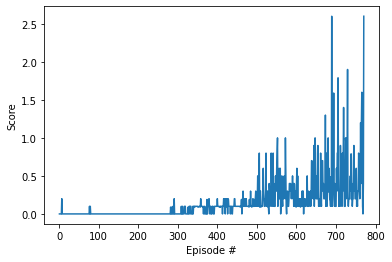

In [5]:
def maddpg(n_episodes=1000, max_t=1000, print_every=25):
    agent = Agent(state_size=24, action_size=2, random_seed=2)
    max_score = []
    avg_score = []
      
    for i_episode in range(1, n_episodes+1):        
        env_info = env.reset(train_mode=True)[brain_name]
        scores = np.zeros(num_agents)
        states = env_info.vector_observations
        agent.reset() 
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations   # get the next state
            rewards = env_info.rewards                   # get the reward
            dones = env_info.local_done                  # see if episode has finished
            
            for state, action, reward, next_state, done in zip(states, actions, rewards,next_states,dones):
                agent.step(state, action, reward, next_state, done,t)
            states = next_states            
         
            scores+=rewards
            if done:
                break 
        
        max_score.append(np.max(scores))
        current_average = np.average(max_score[-100:])
        avg_score.append(current_average)
        
        if i_episode % print_every == 0:
            print('\rEp. {}\tCurrent Max: {:.2f}; Avg: {:.2f}'.format(i_episode, np.max(scores),current_average))
            
            
        if current_average > .5:    
            print('\rEp. {}\tCurrent Max: {:.2f}; Avg: {:.2f}'.format(i_episode, np.max(scores),current_average))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    
    return max_score

scores = maddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
env.close()

When finished, you can close the environment.

In [8]:
print(i_episode)

NameError: name 'i_episode' is not defined